**Image Augmentation**

In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_datagen.flow_from_directory('D:\Downloads\Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
xtest = test_datagen.flow_from_directory('D:\Downloads\Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


**Create model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
model = Sequential()

**Convolution layer**

In [8]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**Maxpooling **

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [10]:
model.add(Flatten())

**Dense layer**

In [11]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(300,activation='relu')) #hiddenlayer 2
model.add(Dense(150,activation='relu')) #hiddenlayer 3

**Output layer**

In [12]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

C:\Users\Arshath\AppData\Local\Temp\ipykernel_1384\2033910576.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/10
44/44 [==============================] - 32s 703ms/step - loss: 1.5327 - accuracy: 0.3811 - val_loss: 1.1783 - val_accuracy: 0.5136
Epoch 2/10
44/44 [==============================] - 29s 667ms/step - loss: 1.1522 - accuracy: 0.5288 - val_loss: 1.1435 - val_accuracy: 0.5330
Epoch 3/10
44/44 [==============================] - 29s 664ms/step - loss: 1.0725 - accuracy: 0.5689 - val_loss: 1.1507 - val_accuracy: 0.5599
Epoch 4/10
44/44 [==============================] - 27s 627ms/step - loss: 1.0620 - accuracy: 0.5678 - val_loss: 1.1351 - val_accuracy: 0.5654
Epoch 5/10
44/44 [==============================] - 28s 629ms/step - loss: 0.9695 - accuracy: 0.6115 - val_loss: 1.1223 - val_accuracy: 0.5601
Epoch 6/10
44/44 [==============================] - 27s 628ms/step - loss: 0.9256 - accuracy: 0.6356 - val_loss: 1.0889 - val_accuracy: 0.5969
Epoch 7/10
44/44 [==============================] - 28s 636ms/step - loss: 0.9353 - accuracy: 0.6375 - val_loss: 0.9412 - val_accuracy: 0.6361

**Saving**

In [15]:
model.save('Flowers.h5')

**Testing the model**

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [17]:
img = image.load_img('D:\Downloads\Flowers-Dataset/flower2.jpg',target_size=(64,64))

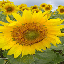

In [18]:
img

In [19]:
x = image.img_to_array(img)
x

array([[[215., 233., 247.],
        [219., 229., 231.],
        [216., 223., 156.],
        ...,
        [204., 211., 230.],
        [203., 211., 230.],
        [201., 212., 230.]],

       [[225., 185.,   0.],
        [212., 199.,  25.],
        [231., 200.,  60.],
        ...,
        [191., 204., 221.],
        [194., 205., 223.],
        [196., 207., 225.]],

       [[213., 195.,   9.],
        [220., 190.,   6.],
        [206., 162.,   3.],
        ...,
        [184., 197., 214.],
        [186., 199., 216.],
        [186., 199., 216.]],

       ...,

       [[ 78.,  99.,  56.],
        [ 79.,  99.,  50.],
        [ 86., 106.,  47.],
        ...,
        [ 93., 103.,  51.],
        [ 74.,  75.,  44.],
        [ 36.,  51.,  10.]],

       [[ 80.,  99.,  54.],
        [ 80., 100.,  51.],
        [ 87., 108.,  51.],
        ...,
        [ 39.,  36.,  17.],
        [ 51.,  45.,  23.],
        [ 38.,  31.,  13.]],

       [[ 79.,  99.,  46.],
        [ 78.,  98.,  49.],
        [ 86., 1

In [20]:
x = np.expand_dims(x,axis=0)
x

array([[[[215., 233., 247.],
         [219., 229., 231.],
         [216., 223., 156.],
         ...,
         [204., 211., 230.],
         [203., 211., 230.],
         [201., 212., 230.]],

        [[225., 185.,   0.],
         [212., 199.,  25.],
         [231., 200.,  60.],
         ...,
         [191., 204., 221.],
         [194., 205., 223.],
         [196., 207., 225.]],

        [[213., 195.,   9.],
         [220., 190.,   6.],
         [206., 162.,   3.],
         ...,
         [184., 197., 214.],
         [186., 199., 216.],
         [186., 199., 216.]],

        ...,

        [[ 78.,  99.,  56.],
         [ 79.,  99.,  50.],
         [ 86., 106.,  47.],
         ...,
         [ 93., 103.,  51.],
         [ 74.,  75.,  44.],
         [ 36.,  51.,  10.]],

        [[ 80.,  99.,  54.],
         [ 80., 100.,  51.],
         [ 87., 108.,  51.],
         ...,
         [ 39.,  36.,  17.],
         [ 51.,  45.,  23.],
         [ 38.,  31.,  13.]],

        [[ 79.,  99.,  46.],
       

In [21]:
model.predict(x)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 0., 1., 0.]], dtype=float32)

In [22]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [23]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 25ms/step


'sunflower'